<a href="https://colab.research.google.com/github/Georgia-MAX-holic/footprints/blob/main/PJ/game_sale/New/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본셋팅 

- install category_encoders 
- Google mount 
- import pandas as pd 
- SNS_BAR_PLOT

In [224]:
!pip install category_encoders

import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)

def SNS_BAR_PLOT(X, Y ,TITLE, DATA):
  plt.figure(figsize=(30,10))
  graph = sns.barplot(x=X, y=Y, data=DATA).set_title(TITLE)
  return graph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 가장 많이 팔린 게임들 

## 전처리 & Code

In [225]:
def sales_max() : 
  df_chart = df[["Name","Global_Sales"]] 
  df_chart.set_index("Name", inplace = True )
  sales_max = df_chart.idxmax(axis=0 , skipna=True )
  return sales_max

In [226]:
sales_max()

Global_Sales    Wii Sports
dtype: object

In [227]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E
1,NaN,NaN,PUBG,Series,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
3,448.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


가장 많이 팔린 제품 = 닌텐도 윌 스포츠  , 그리고 중ㅂ

In [228]:
df=  df.sort_values(by="Rank" , ascending = True)
df=df[["Rank","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Score","User_Count","Rating"]]

In [229]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,E
2,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
3,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
5,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,E
6,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,E


In [230]:
df=df.drop_duplicates() # 모든 조건이 똑같은 중복된 값이 일부 존재하는듯 하다, 제거 

In [231]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,8,322.0,E
2,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
5,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,8.3,709.0,E
6,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,8,192.0,E
7,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## 그래프 

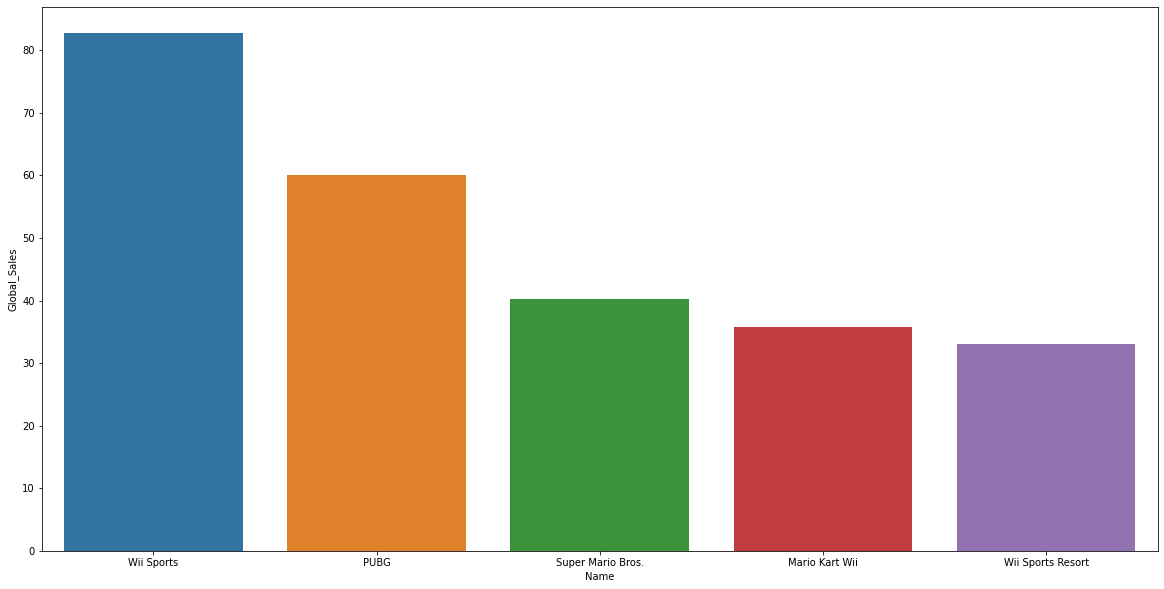

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_visual=df.loc [[0,1,2,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual) 

# 연도별 판매량 , 플랫폼별 판매량 , 장르별 판매량

## Code 

In [233]:
df_Platform = df[["Platform","Global_Sales"]].dropna()
df_Genre =  df[["Genre", "Global_Sales"]]

In [234]:
df_Platform = df_Platform.groupby("Platform").sum()
df_Genre = df_Genre.groupby("Genre").sum()

In [235]:
df_Platform = df_Platform.sort_values(by="Global_Sales" , ascending=False).reset_index()
df_Genre = df_Genre.sort_values(by="Global_Sales", ascending=False).reset_index()

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
release_date_sale =  df[["Year","Global_Sales"]].groupby('Year')['Global_Sales'].sum().reset_index()

## 그래프 


Text(0.5, 1.0, 'Global_Sales_Genre')

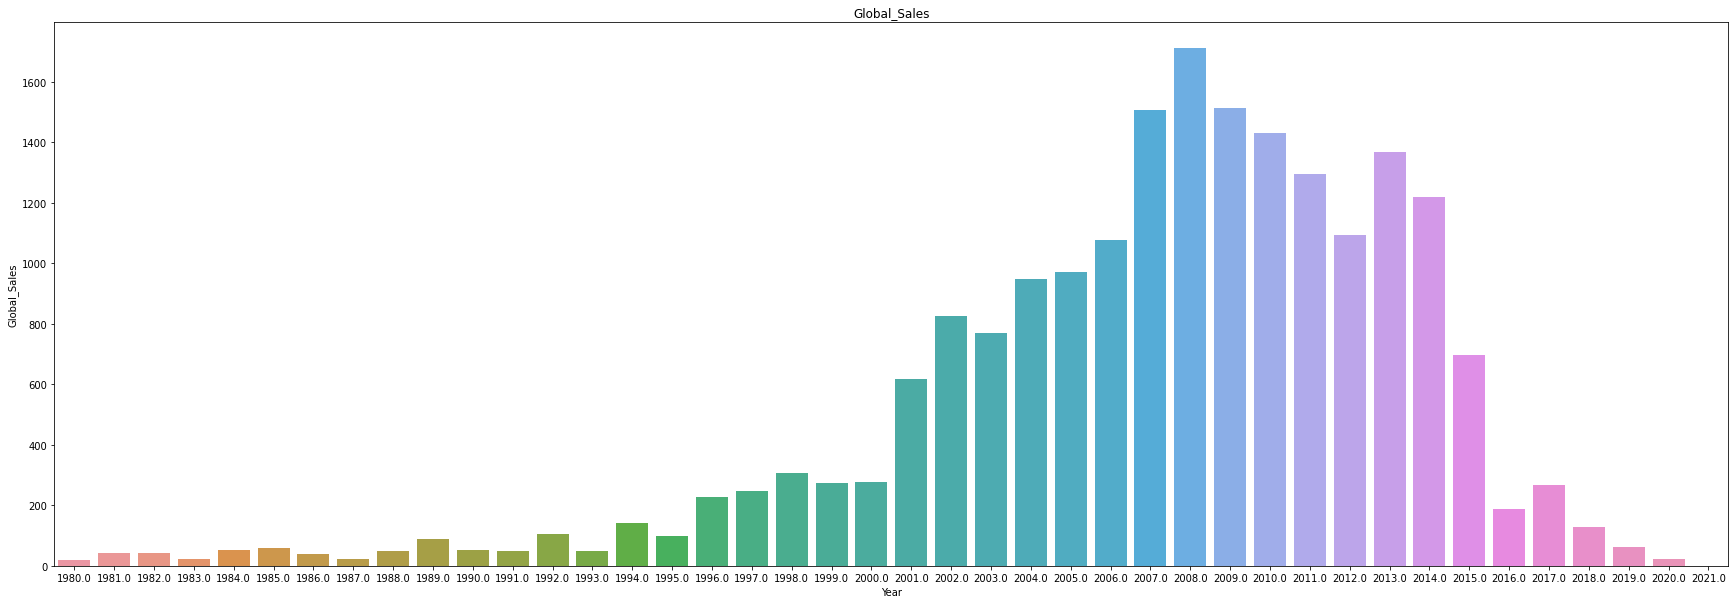

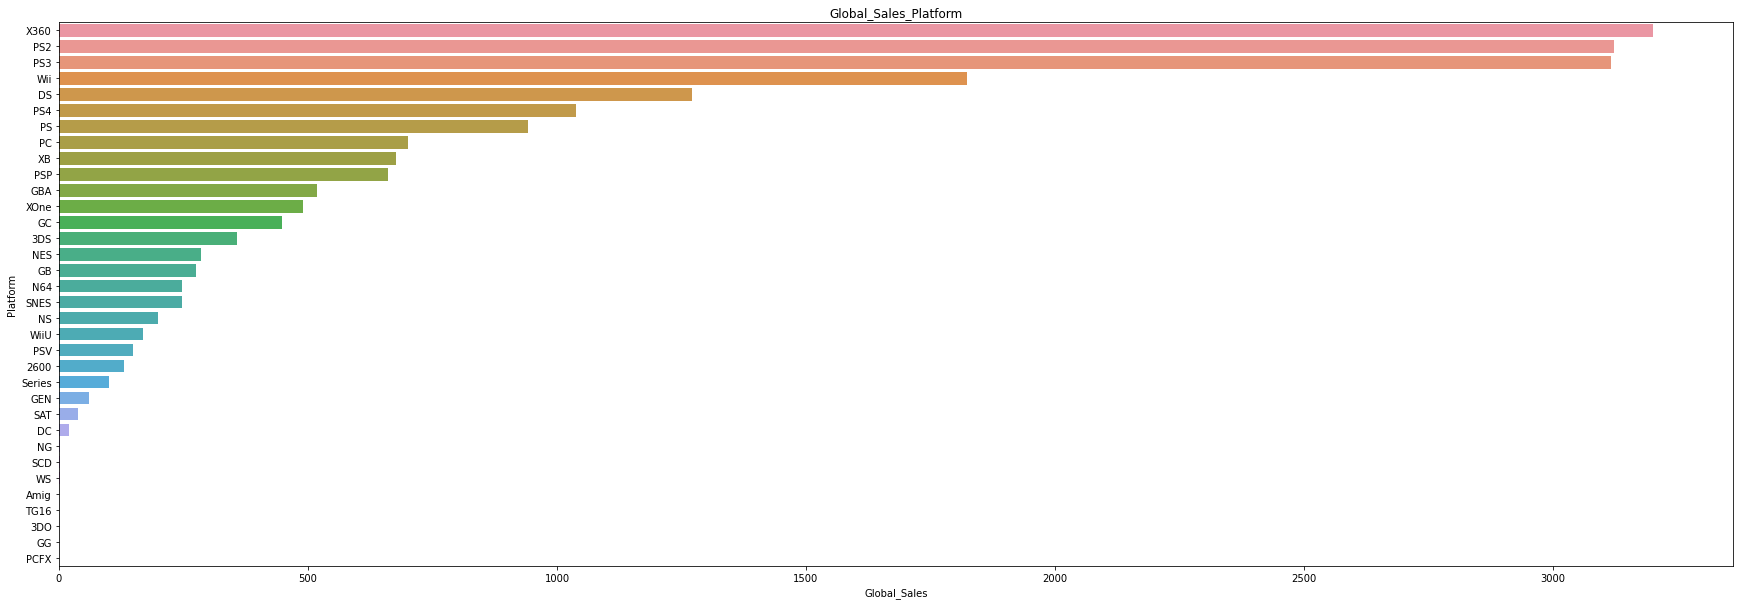

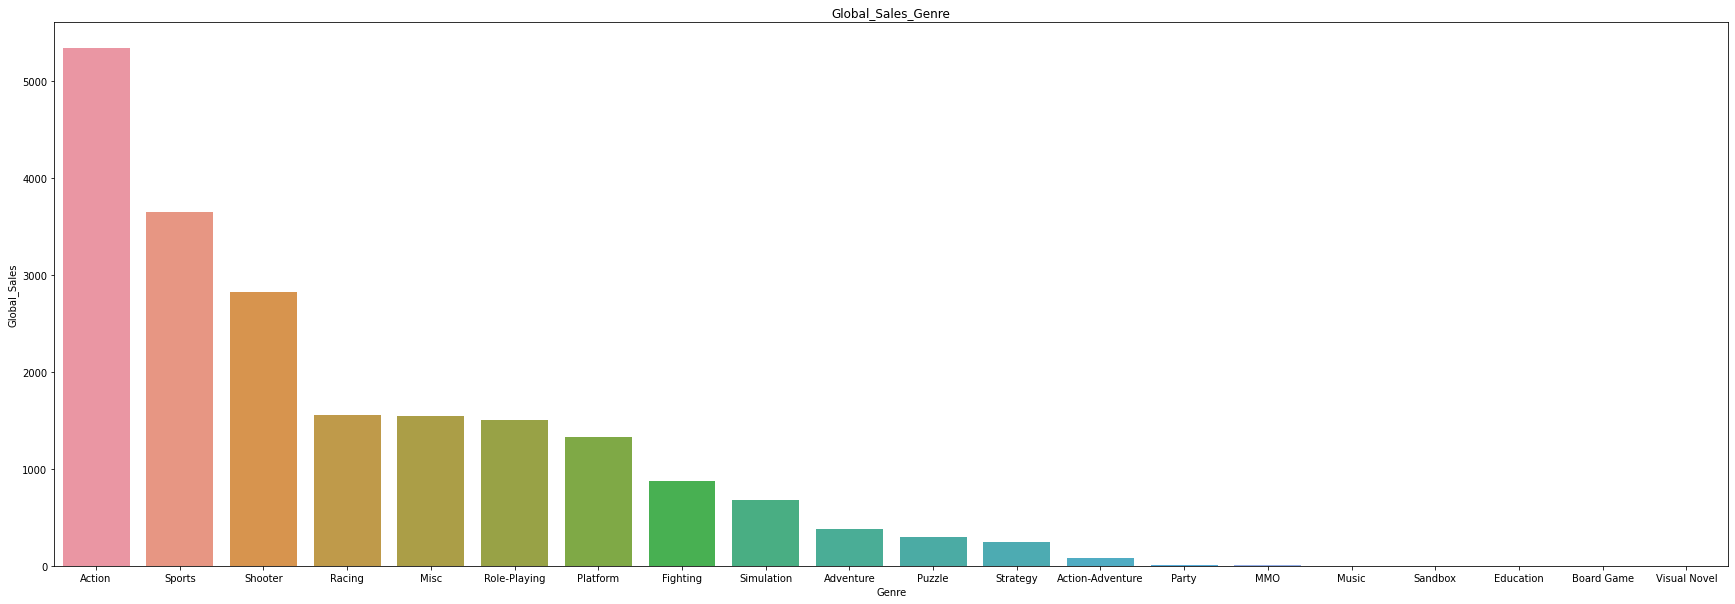

In [237]:
SNS_BAR_PLOT("Year","Global_Sales","Global_Sales",release_date_sale)

SNS_BAR_PLOT("Global_Sales","Platform" , "Global_Sales_Platform",df_Platform)

SNS_BAR_PLOT("Genre","Global_Sales","Global_Sales_Genre",df_Genre)


# 시간의 흐름에 따라 인기있는 장르가 다른지

## Code

In [238]:
def do_list_release_date_genre(i, title) :
 df_year=df[["Year","Genre" , title]]

 df_year=df[df["Year"] == i]
 df_release_date=df_year[["Year","Genre","Global_Sales"]].groupby(by=['Year','Genre']).sum().idxmax()
 return df_release_date


def Genre_release():
  graph_df = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index().dropna()
  year_sale = graph_df.groupby(by=['Year'])['Global_Sales'].transform(max) == graph_df['Global_Sales']
  year_sale_max = graph_df[year_sale].reset_index(drop=True)


  genre = year_sale_max['Genre']

  plt.figure(figsize=(30, 18))
  g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
  index = 0
  for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

  plt.xticks(rotation=90)
  plt.show()

## 연도별 선호 장르 Text

In [239]:
for i in range(1980,2021):
   print(do_list_release_date_genre(i,"Global_Sales"))

Global_Sales    (1980.0, Shooter)
dtype: object
Global_Sales    (1981.0, Action)
dtype: object
Global_Sales    (1982.0, Puzzle)
dtype: object
Global_Sales    (1983.0, Platform)
dtype: object
Global_Sales    (1984.0, Shooter)
dtype: object
Global_Sales    (1985.0, Platform)
dtype: object
Global_Sales    (1986.0, Action)
dtype: object
Global_Sales    (1987.0, Fighting)
dtype: object
Global_Sales    (1988.0, Platform)
dtype: object
Global_Sales    (1989.0, Puzzle)
dtype: object
Global_Sales    (1990.0, Platform)
dtype: object
Global_Sales    (1991.0, Platform)
dtype: object
Global_Sales    (1992.0, Fighting)
dtype: object
Global_Sales    (1993.0, Platform)
dtype: object
Global_Sales    (1994.0, Platform)
dtype: object
Global_Sales    (1995.0, Role-Playing)
dtype: object
Global_Sales    (1996.0, Role-Playing)
dtype: object
Global_Sales    (1997.0, Action)
dtype: object
Global_Sales    (1998.0, Action)
dtype: object
Global_Sales    (1999.0, Role-Playing)
dtype: object
Global_Sales    (2000.

## 그래프

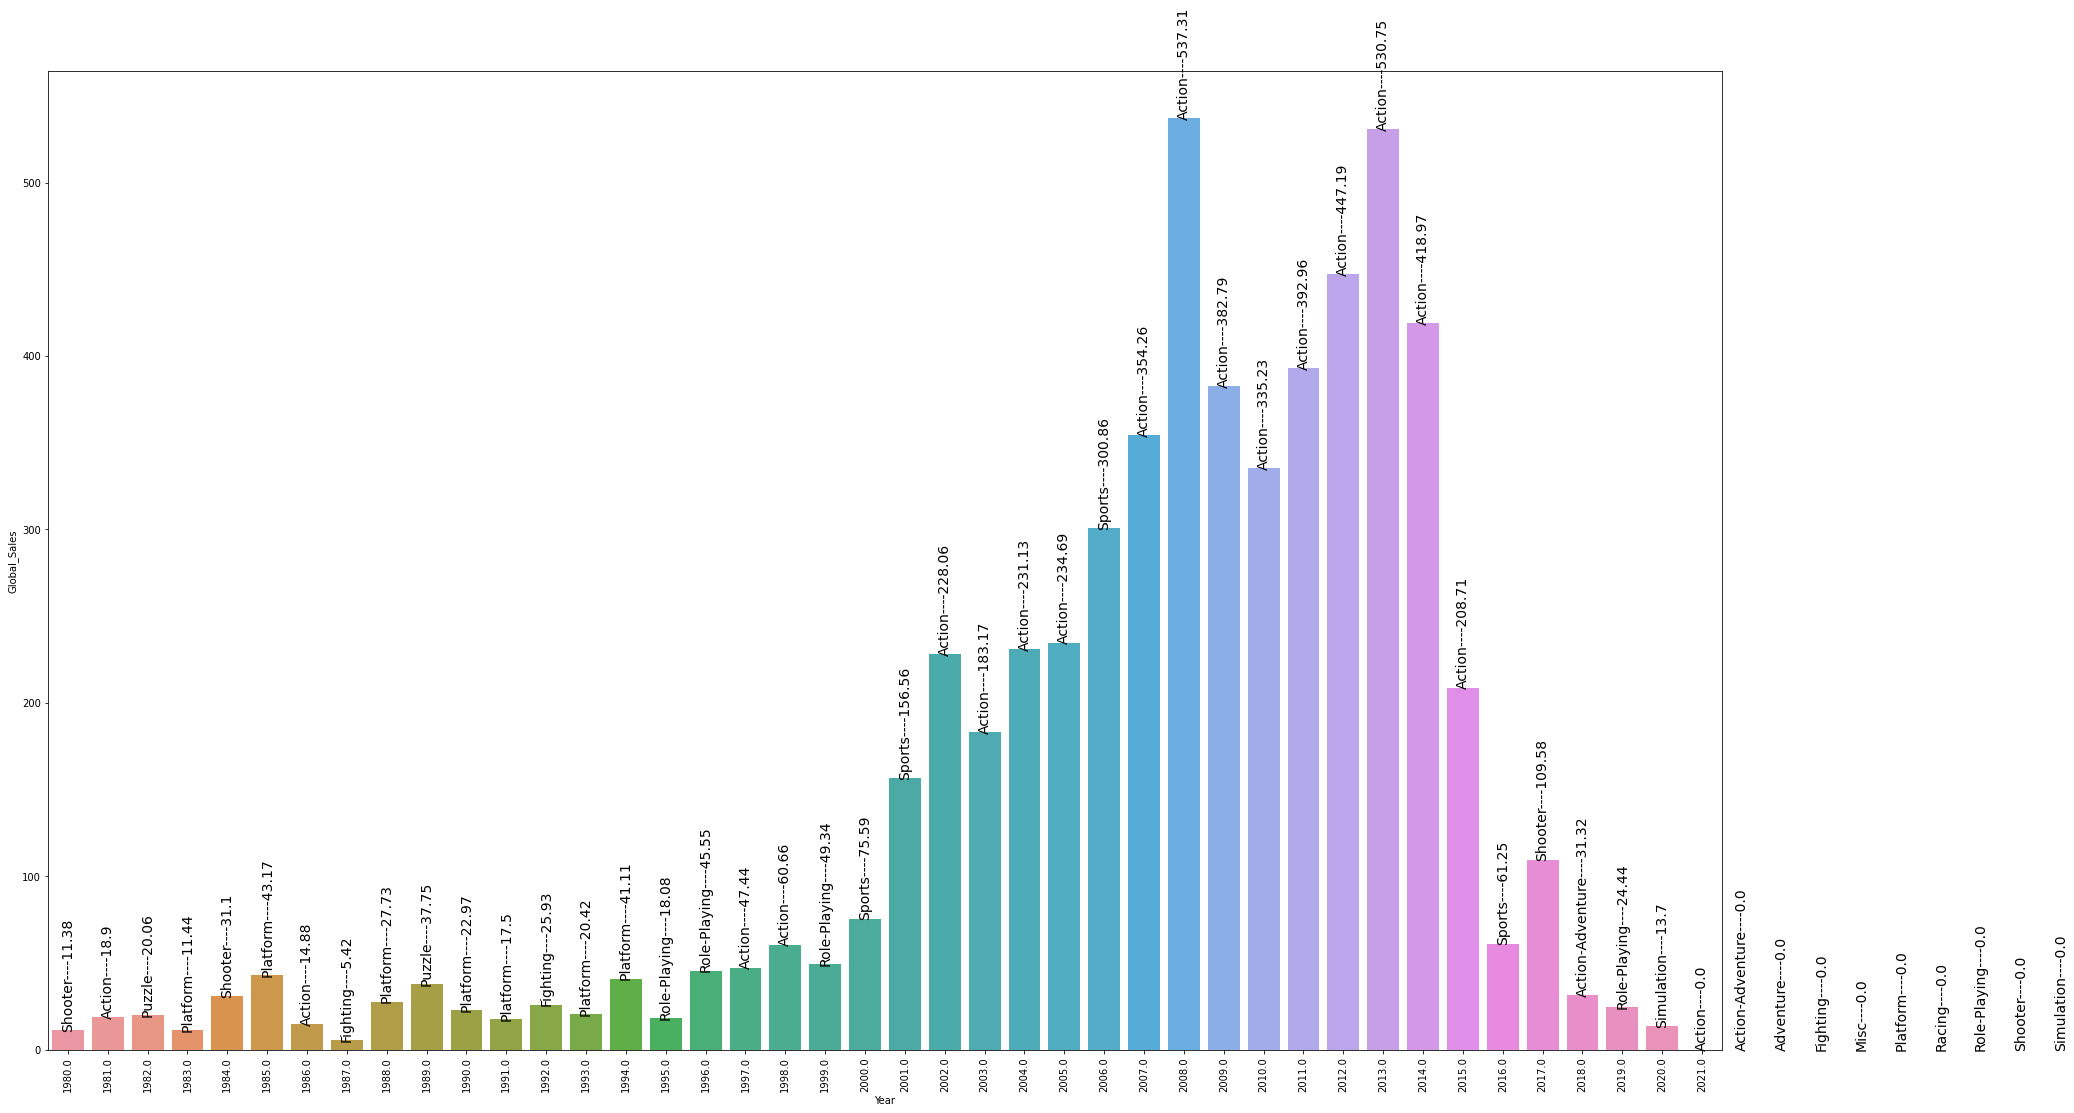

In [240]:
Genre_release()

매년 달라지긴 하지만 액션 게임의 비중이 높음

---

# 각 국가별 판매량 

## Code

In [241]:
def GENRE ():
  graph_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
  comp_map = graph_genre.groupby(by=['Genre']).sum()
  comp_table = comp_map.reset_index().dropna()
  comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
  plt.figure(figsize=(15, 10))
  sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
  comp_map = comp_map.reset_index().dropna()

# 그래프 

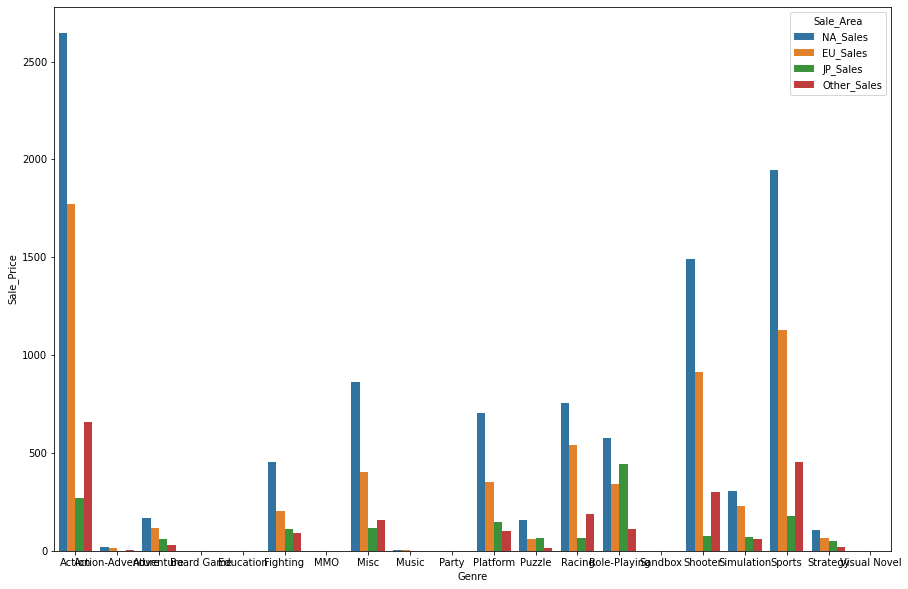

In [242]:
GENRE ()

Text(0.5, 1.0, 'EU_Genre_Sales')

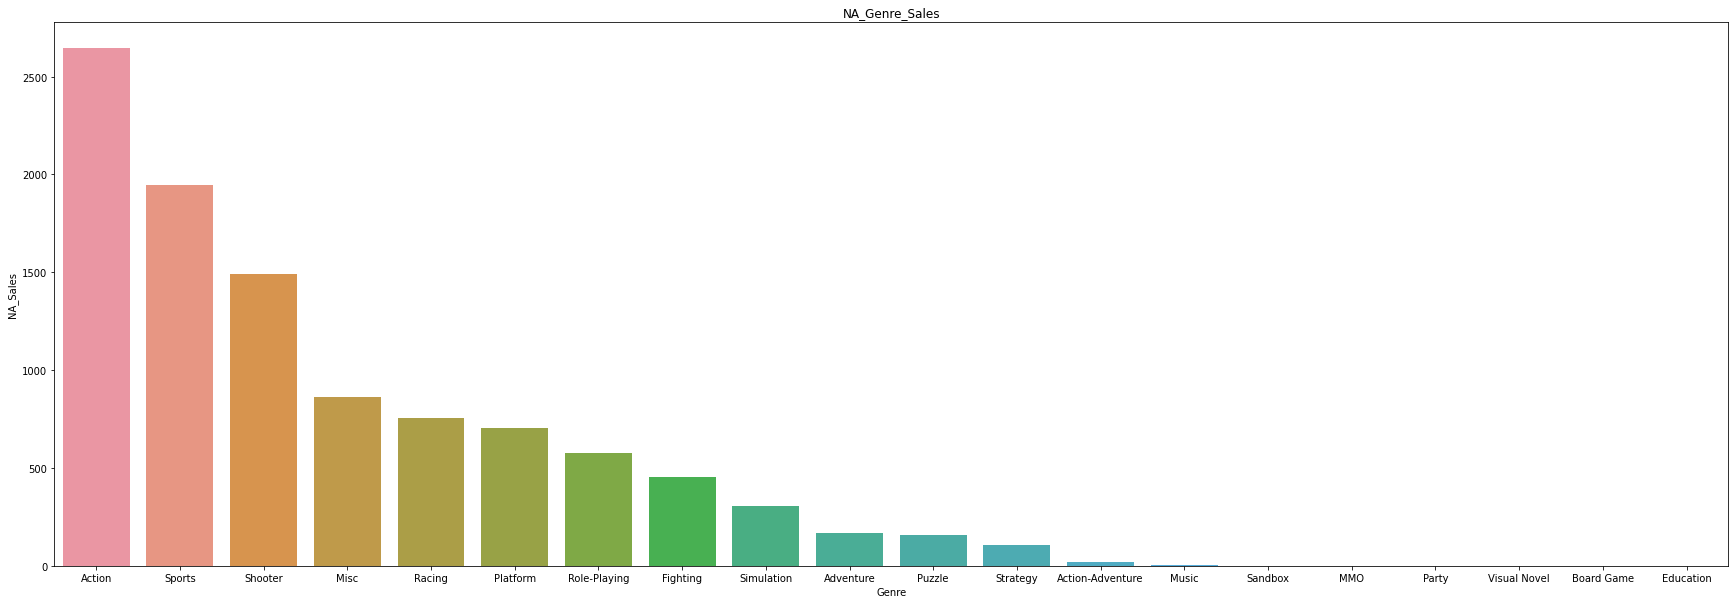

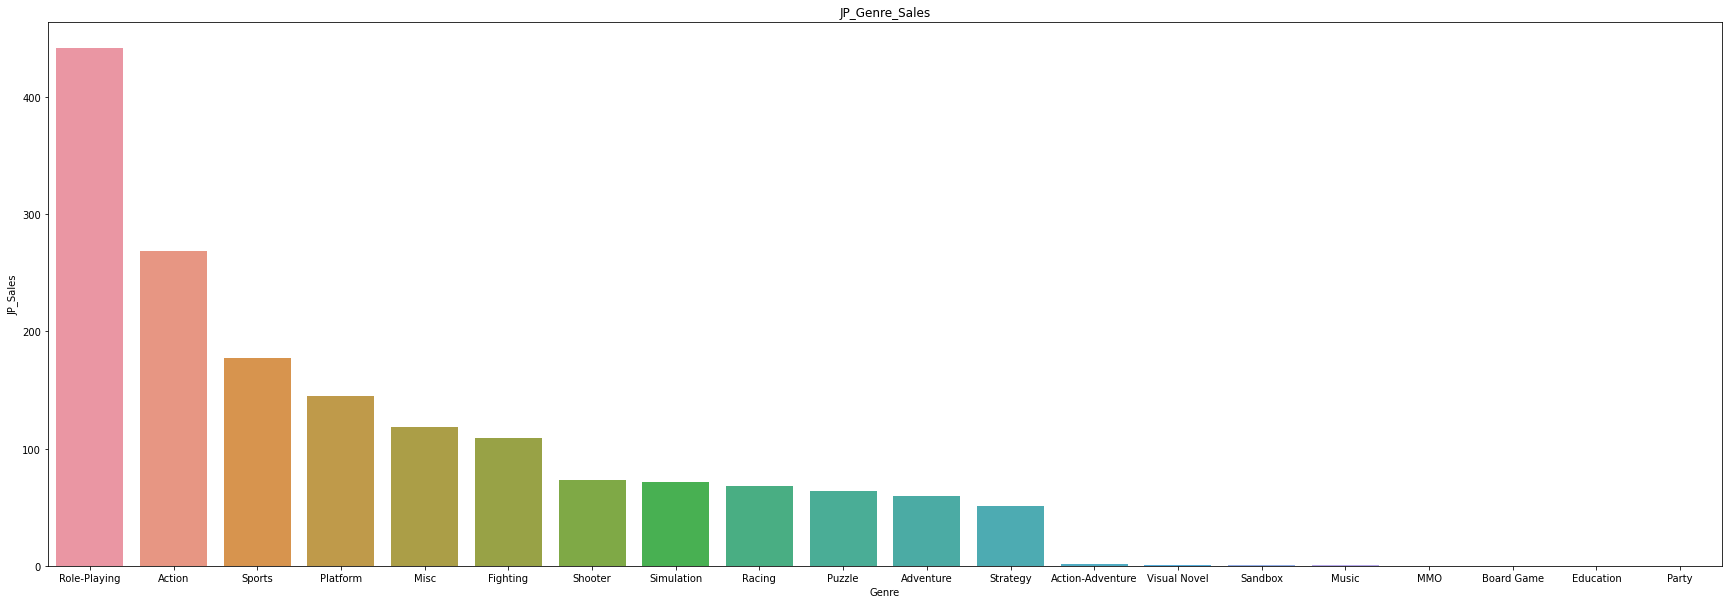

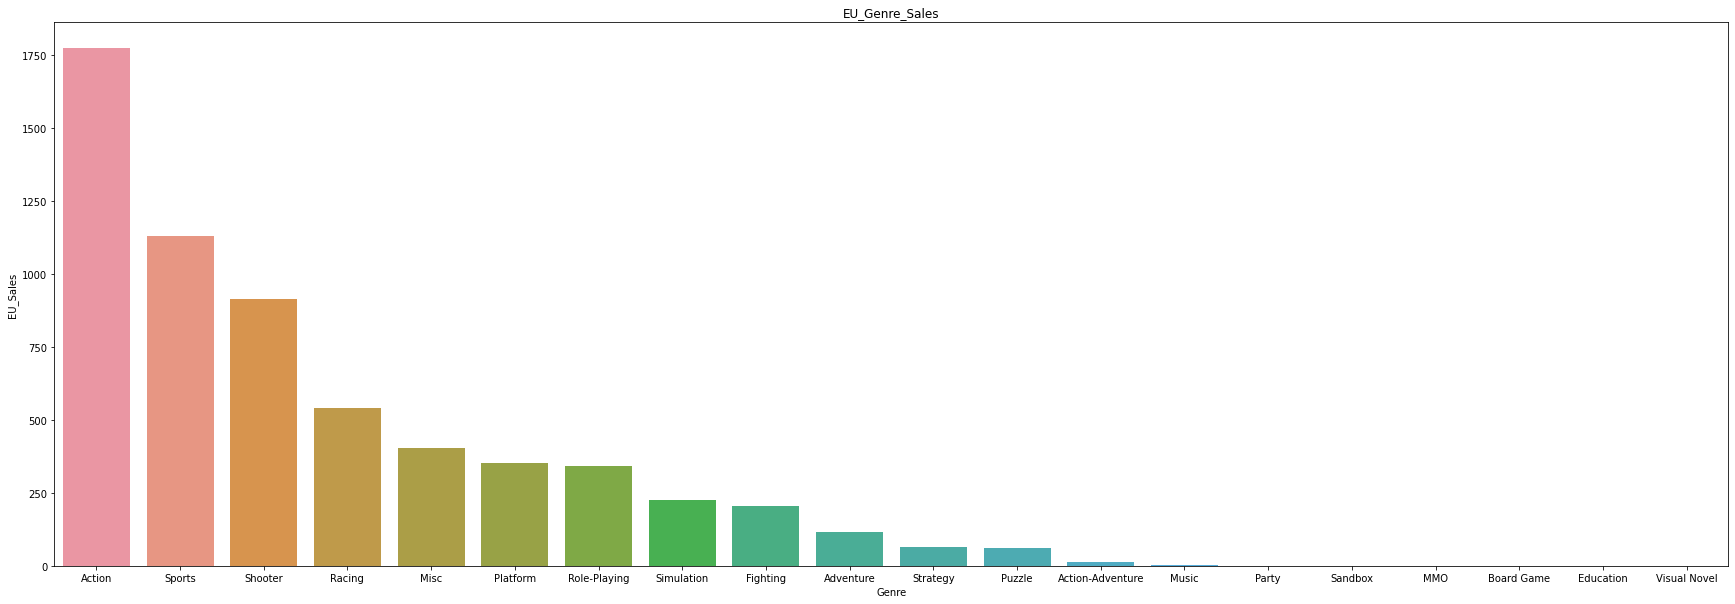

In [243]:

SNS_BAR_PLOT("Genre","NA_Sales","NA_Genre_Sales" ,comp_map.sort_values(by="NA_Sales",ascending=False))
SNS_BAR_PLOT("Genre","JP_Sales","JP_Genre_Sales" ,comp_map.sort_values(by="JP_Sales",ascending=False))
SNS_BAR_PLOT("Genre","EU_Sales","EU_Genre_Sales",comp_map.sort_values(by="EU_Sales",ascending=False))

EU와 NA 는 액션과 스포츠가 가장 인기 있지만 예외적으로 일본은 Role_Playing 게임이 인기가 많은 것을 볼 수 있다 , 드래곤퀘스트나 파이널 판타지의 영향이 있지 않을까 싶다 

---

## 세계 추세를 따라가지 않는 국가별 게임 취향 

## Code 

In [244]:
import numpy as np
USE=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()
USE["linear"]= np.nan

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

def LinearRegression_use(features , target):
   X_train, X_test, y_train, y_test = train_test_split( USE[[features]],USE[[target]],test_size = 0.2, random_state = 11)
   model =  LinearRegression()
   model.fit(X_train, y_train)
   
   print("MSE:",mean_squared_error(y_test, model.predict(X_test)))

   y_pred = model.predict(USE[[features]])
   USE["linear"].fillna(pd.Series(y_pred.flatten()), inplace=True)
   USE["compare"]=USE["linear"]<USE[target]
   return USE

def graph(X,Y,TITLE):
   USE = LinearRegression_use(X, Y).dropna()
   df_True = USE[USE[USE_LIST]["compare"]==True]
   df_False = USE[USE[USE_LIST]["compare"]==False]
   df_True.drop(df_True[df_True[Y]<0.01].index , inplace = True)
   df_True[df_True["linear"]<0] =0 
   plt.figure(figsize=(20,10)) 
   return sns.barplot(x=df_True["Genre"], y=df_True[Y], data=df_True).set_title(TITLE)

USE_LIST = ["Name","Platform","Genre","Publisher","Global_Sales","JP_Sales","compare","linear"]

## 그래프

MSE: 0.043702620571489464


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-245-0c47d56acd70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

MSE: 0.07059340867127181


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-245-0c47d56acd70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

MSE: 0.041624890992645845


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-245-0c47d56acd70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_True[df_True["linear"]<0] =0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Text(0.5, 1.0, 'Global - EU')

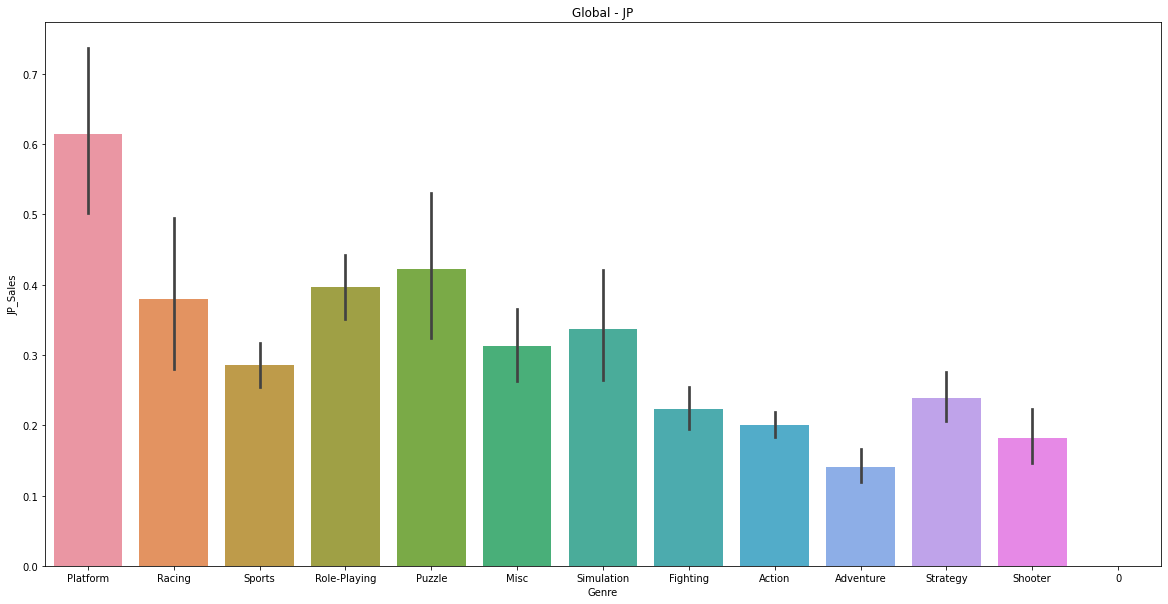

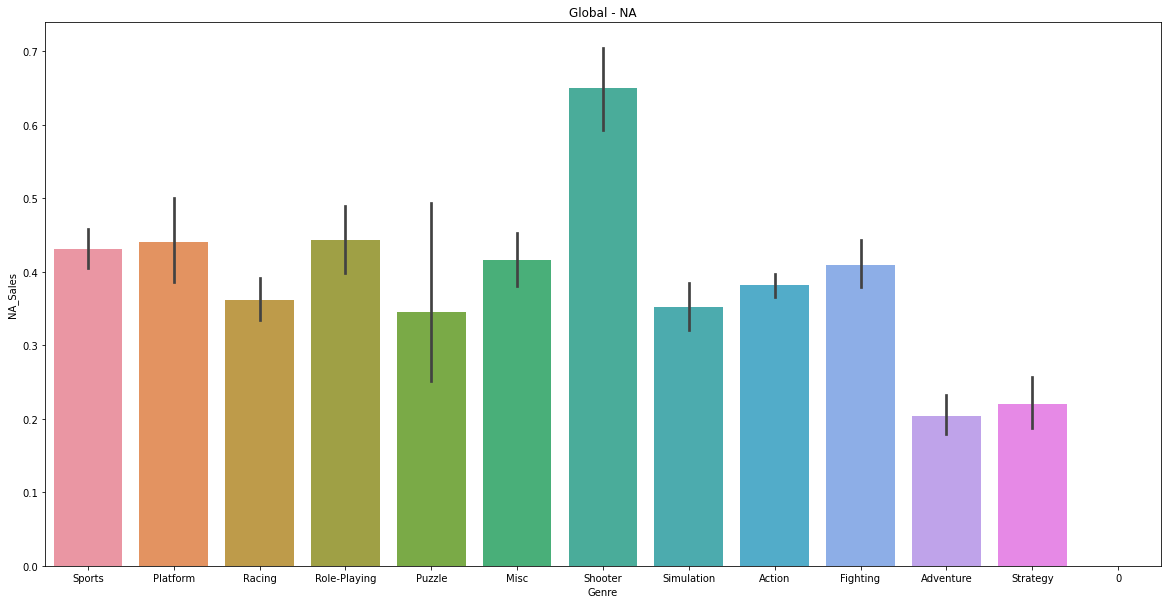

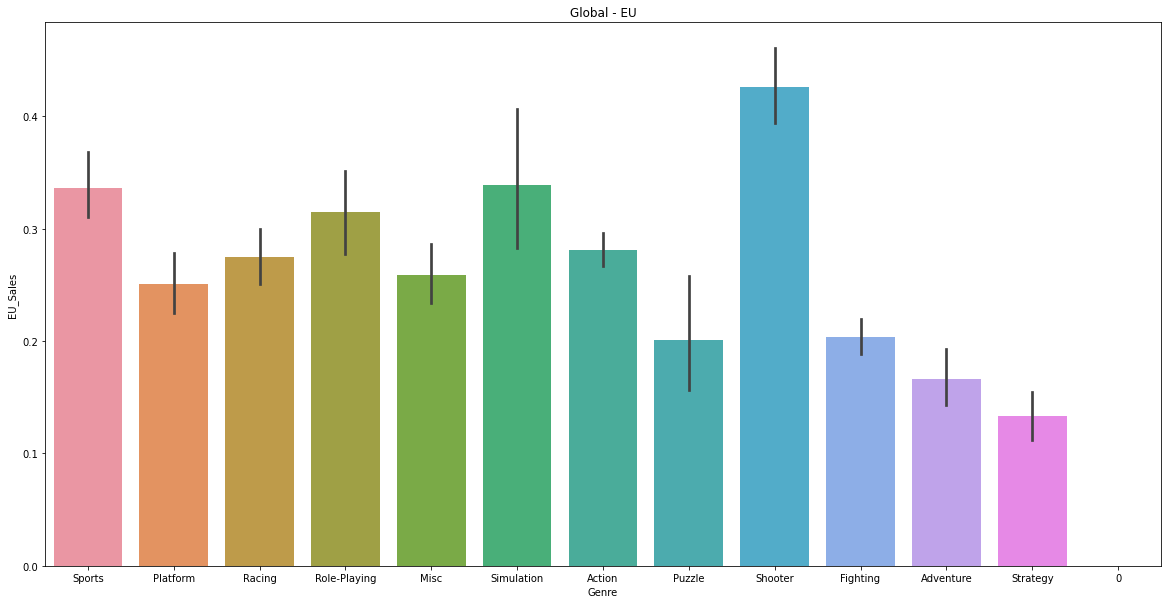

In [246]:
graph("Global_Sales","JP_Sales","Global - JP")
graph("Global_Sales","NA_Sales", "Global - NA")
graph("Global_Sales","EU_Sales", "Global - EU")

각 국가별로 Global_Sales를 이용한 선형회귀를 사용하였다.
 예측값 보다 높게 판매가 된 게임은 인기가 좋았거나 , 특별히 히트를 쳤다고 볼 수 있겠다.

그러므로 대박을 노리고 있다면 예측값보다 더 판매가 많이된 게임들의 장르를 노린다면 그 국가에서 대박칠 가능성이 높아질것이다.



- NA : Shooter 장르가 가장 특출나게 인기가 많았고, Sports, Platform, Role-Playing이 비슷하게 나왔다 . Adventure와 Strategy를 제외하고는 히트칠 가능성이 있고 Shooter 장르를 노리면 크게 한탕칠 가능성이 있음 

- 일본 : Platform 장르가 세계 판매량과 비교하여 많이 팔렸다. (ex: 슈퍼마리오) , 다른 국가들과는 다르게 shooter action, sports 장르가 그닥 히트치지는 못했는데 히트를 노린다면 조금 다른 전략을 이용할 필요가 있어보임 

- EU  : shooter 장르가 특히 더 많이 팔림 , 그 다음으로 스포츠 게임이 많이 팔렸고 롤플레잉과 시뮬레이션이 있기 있었다. Platform은 히트칠 가능성이 조금 밀리는 경향이 있는듯 


---

#랜덤 포레스트


## Code

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ALL = critic_df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
CRITIC =critic_df[["Critic_Score","Critic_Count","User_Score","User_Count"]]
SALES =critic_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

chart = USE[["Year","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].groupby("Year").sum().reset_index()
critic_df= df[["Critic_Score","Critic_Count","User_Score","User_Count","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Rating"]].dropna()

def critic(n, LIST, TITLE):
   %matplotlib inline
   Rating = pd.get_dummies(critic_df["Rating"])
   
   X_Critic = LIST
   y_Global = Rating  

   X_train ,X_test , y_train, y_test = train_test_split(X_Critic, y_Global, train_size= 0.7 , test_size =0.3)

   clf = RandomForestClassifier(n_estimators=n)
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   print("정확도",accuracy_score(y_test,y_pred)*100,"점")
   ftr_importances_values = clf.feature_importances_
   ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
   tr_top20 = ftr_importances.sort_values(ascending=False)

   return make_chart(TITLE, tr_top20,  tr_top20.index)

def make_chart(TITLE, X, Y ):
   plt.figure(figsize=(8,6))
   plt.title(TITLE)
   sns.barplot(x=X, y=Y)
   return plt.show()



In [248]:
rfs_Platform = df[["Platform","Year","Global_Sales","JP_Sales","EU_Sales","NA_Sales","Rating"]].dropna()
rfs_Platform= rfs_Platform[rfs_Platform["Year"]>=2010]

In [249]:
rfs_Platform

,Platform,Year,Global_Sales,JP_Sales,EU_Sales,NA_Sales,Rating
20,X360,2010.0,21.82,0.24,4.94,14.97,E
21,PS3,2013.0,21.40,0.97,9.27,7.01,M
22,PS3,2013.0,21.40,0.97,9.27,7.01,M
23,PS3,2013.0,21.40,0.97,9.27,7.01,M
24,PS3,2013.0,21.40,0.97,9.27,7.01,M
...,...,...,...,...,...,...,...
34459,XOne,2016.0,0.01,0.00,0.01,0.00,E
34462,XOne,2016.0,0.01,0.00,0.01,0.00,E
34461,XOne,2016.0,0.01,0.00,0.01,0.00,E
34456,3DS,2011.0,0.01,0.00,0.00,0.01,T


## 그래프

정확도 51.43500281373101 점


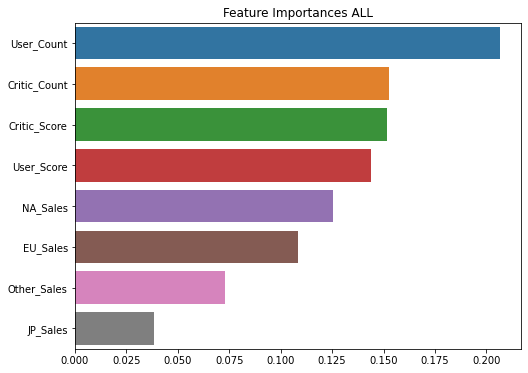

정확도 82.68617520165073 점


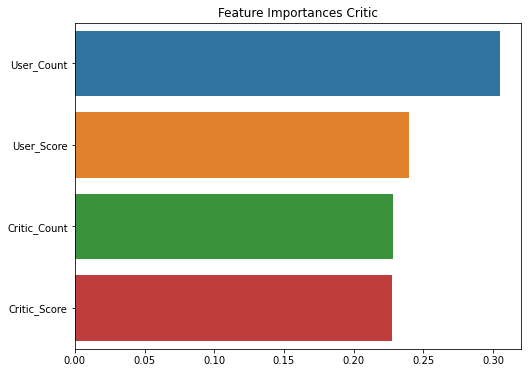

정확도 52.447945976364664 점


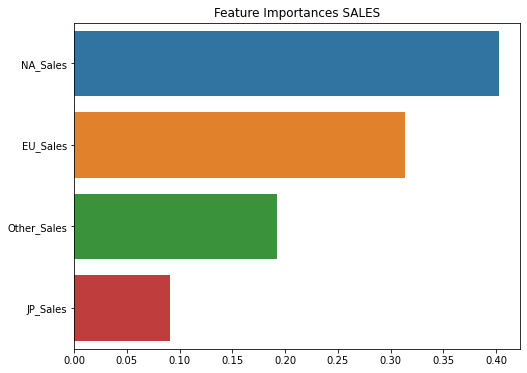

In [250]:
critic(100, ALL,"Feature Importances ALL")
critic(100, CRITIC ,"Feature Importances Critic")
critic(100, SALES ,"Feature Importances SALES")

- 판매량 + 크리틱 점수 : 정확도가 썩 좋진 않다

- 크리틱 점수 : 정확도가 썩 나쁘진 않다 

- 판매량 : 썩 좋진 않다.



- 평점들 위주로 예측 평가에 영향을 주고 있다. 판매량으로 등급 예측은 가능하지만 정확도가 많이 떨어지는것을 알 수 있다 . 

 즉 단순히 판매량만으로 등급을 매기기는 어려우며 단순히 많고 적게 팔렸다고 좋거나 나쁜 게임은 아닌것이라 볼 수 있다.




- 게임 등급은 유저 투표량, 크리틱 점수 등 게임 평점을 영향을 크게 받는다.
 특히 유저 점수에 크게 영향을 받는것을 알 수 있다.
  즉 얼마나 유저들에게 어떠한 경험을 하게 해주었고, 투표 까지 이끌었는지에 큰 영향을 받음 
  
   => 등급 높게 받으려면 게임 완성도가 높아야됨


- 요약 : 단순히 판매량만 높다고 해서 좋은 게임은 아니라는 뜻 

(단순 마케팅만 잘해도 예약구매등으로 판매량 잘 뽑아내기는 한다 ex: 사이버펑크 2077)

#썸네일 

## Code

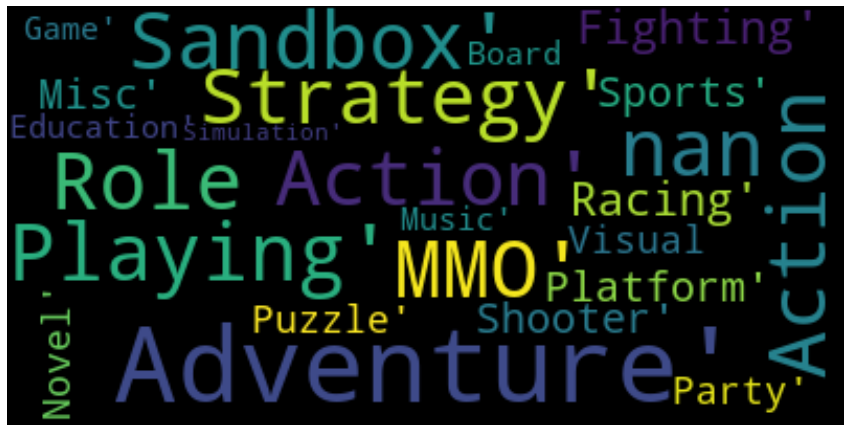

In [251]:

from wordcloud import WordCloud, ImageColorGenerator

text = list(set(df['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()